<a href="https://colab.research.google.com/github/davidivan13/Data-Science/blob/main/Uji_Hipotesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [52]:
import numpy as np #library untuk matematika
import pandas as pd #library untuk dataframe
import seaborn as sns #library untuk visualisasi
import matplotlib.pyplot as plt

# One sample T-test

Digunakan untuk membandingkan hasil dari eksperimen yang tidak memiliki benchmark sebelumnya

# Contoh Pengujian Hipotesis Satu Populasi

In [53]:
# https://docs.google.com/spreadsheets/d/1x3abnbEGqMqYlPoDqss5Puxkx0B9owImUENxGGtXdm4/edit?gid=235186554#gid=235186554
# google_sheets_link = 'https://docs.google.com/spreadsheets/d/1x3abnbEGqMqYlPoDqss5Puxkx0B9owImUENxGGtXdm4/export?format=csv'
df = pd.read_csv("AB_Test_Results - AB_Test_Results.csv")
# df = pd.read_csv(google_sheets_link, sep=',')

## Menghitung secara manual

In [54]:
nilai = [74, 49, 68, 86, 80, 71, 77, 81, 72, 77]

In [55]:
np.mean(nilai)

np.float64(73.5)

In [56]:
x_bar = np.mean(nilai)
mu = 80
s = np.std(nilai, ddof = 1)
n = len(nilai)

t_stat = (x_bar - mu) / (s / np.sqrt(n))

print(t_stat)

-2.0346749160869684


In [57]:
from scipy.stats import t
t.ppf(0.05, n - 1)

np.float64(-1.8331129326536337)

## Menggunakan function Python

In [58]:
from scipy.stats import ttest_1samp

In [59]:
t_stat, p_value = ttest_1samp(nilai, 80)

In [60]:
t_stat

np.float64(-2.0346749160869684)

In [61]:
# p_value -> tergantung dari kesepakatam peneliti -> 1%, 5%, 10%
# -> peluang kesalahan ketika kita menolak H0
# -> 100 test -> hanya ada x% tes yang tidak memenuhi H0
# -> 5% -> ada 5 test yang nilai rata-rata nya boleh di bawah sm dgn 80

# Contoh Implementasi

In [62]:
variant_revenue = df.loc[df["VARIANT_NAME"] == "variant", "REVENUE"]

In [63]:
variant_revenue.describe()

,REVENUE
count,5016.000000
mean,0.070070
std,1.314802
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,58.630000


<Axes: >

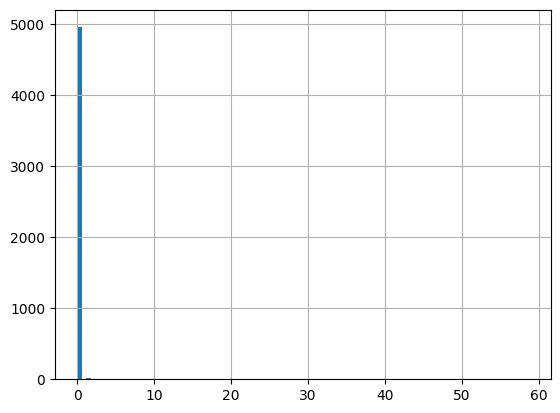

In [64]:
variant_revenue.hist(bins = 100)

In [65]:
ttest_1samp(variant_revenue, 0)

TtestResult(statistic=np.float64(3.774410929668571), pvalue=np.float64(0.00016223887213175306), df=np.int64(5015))

## Contoh Pengujian Hipotesis Dua Populasi

In [66]:
from scipy.stats import norm
norm.rvs(loc = 70, scale = 10, size = 10).round().astype("int")

array([72, 56, 75, 81, 66, 52, 80, 72, 75, 75])

In [67]:
kelas_1 = [74, 49, 68, 86, 80, 71, 77, 81, 72, 77]
kelas_2 = [78, 57, 65, 82, 73, 76, 54, 58]

In [68]:
x_bar1 = np.mean(kelas_1)
s1 = np.std(kelas_1, ddof = 1)
n1 = len(kelas_1)

x_bar2 = np.mean(kelas_2)
s2 = np.std(kelas_2, ddof = 1)
n2 = len(kelas_2)

In [69]:
print(f"Standard deviasi kelas 1: {s1}")
print(f"Standard deviasi kelas 2: {s2}")

Standard deviasi kelas 1: 10.102254973794492
Standard deviasi kelas 2: 10.76286605483343


In [70]:
df = n1 + n2 - 2
sp = np.sqrt(((n1 - 1) * np.power(s1, 2) + (n2 - 1) * np.power(s2, 2)) / df)

In [71]:
t_stat = (x_bar1 - x_bar2) / (sp * np.sqrt(1/n1 + 1/n2))
print(t_stat)

1.140634940065406


In [72]:
from scipy.stats import ttest_ind

In [73]:
t_stat, p_value =  ttest_ind(kelas_1, kelas_2, equal_var = True)

In [74]:
if p_value < 0.05:
  print("Nilai kelas 1 dan kelas 2 berbeda")
else:
  print("Nilai kelas 1 dan kelas 2 sama")

Nilai kelas 1 dan kelas 2 sama


In [75]:
p_value

np.float64(0.2708083866673808)

In [76]:
import pandas as pd
df = pd.read_csv("AB_Test_Results - AB_Test_Results.csv")
variant_revenue = df.loc[df["VARIANT_NAME"] == "variant", "REVENUE"]
control_revenue = df.loc[df["VARIANT_NAME"] == "control", "REVENUE"]

In [77]:
variant_revenue.describe()

,REVENUE
count,5016.000000
mean,0.070070
std,1.314802
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,58.630000


In [78]:
control_revenue.describe()

,REVENUE
count,4984.000000
mean,0.129013
std,3.007524
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,196.010000


<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

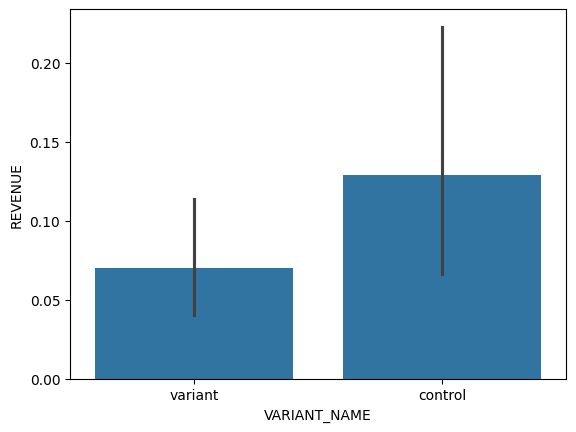

In [79]:
sns.barplot(data = df, y = "REVENUE", x = "VARIANT_NAME")

In [80]:
t_stat, p_value =  ttest_ind(control_revenue, variant_revenue, equal_var = False)
p_value

np.float64(0.20469713432410777)

In [81]:
df.groupby("VARIANT_NAME")["REVENUE"].apply(lambda x: sum(x > 0))

,REVENUE
VARIANT_NAME,
control,80
variant,72


## Contoh Pengujian Hipotesis Dua Populasi Berpasangan

In [82]:
sebelum = [59, 71, 64, 75, 75, 61, 52, 66, 71, 69]
sesudah = [98, 91, 86, 72, 77, 54, 69, 89, 66, 87]

In [83]:
beda = np.array(sesudah) - np.array(sebelum)
x_beda = np.mean(beda)
sd = np.std(beda, ddof = 1)
n = len(beda)
mu = 0

In [84]:
t_stat = (x_beda - mu) / (sd / np.sqrt(n))

In [85]:
t_stat

np.float64(2.6423876827871844)

In [86]:
from scipy.stats import ttest_rel

In [87]:
t_stat, p_value = ttest_rel(sesudah, sebelum)

In [88]:
if p_value < 0.05:
  print("Nilai sesudah berbeda daripada nilai sebelum")
else:
  print("Nilai sesudah sama dengan nilai sebelum")

Nilai sesudah berbeda daripada nilai sebelum


In [89]:
t_stat

np.float64(2.6423876827871844)

## Uji Beda Proporsi

In [90]:
perempuan_selamat = 233
total_perempuan = 314
laki_selamat = 109
total_laki = 577

In [91]:
proporsi_perempuan = perempuan_selamat / total_perempuan
proporsi_laki = laki_selamat / total_laki

prop_gabungan = (perempuan_selamat + laki_selamat) / (total_perempuan + total_laki)

In [92]:
t_stat = (proporsi_perempuan - proporsi_laki) / np.sqrt(prop_gabungan * (1 - prop_gabungan) * (1/ total_perempuan + 1/ total_laki))
print(t_stat)

16.218833930670097


In [93]:
from statsmodels.stats.proportion import proportions_ztest

In [94]:
proportions_ztest([perempuan_selamat, laki_selamat], [total_perempuan, total_laki])

(np.float64(16.218833930670097), np.float64(3.7117477701134797e-59))

In [95]:
proporsi_laki

0.18890814558058924

In [96]:
from statsmodels.stats.proportion import proportions_ztest

In [97]:
control_revneue_positive = df.loc[(df["VARIANT_NAME"] == "control") & (df["REVENUE"] > 0)]["USER_ID"].nunique()
variant_revneue_positive = df.loc[(df["VARIANT_NAME"] == "variant") & (df["REVENUE"] > 0)]["USER_ID"].nunique()

In [98]:
df.groupby("VARIANT_NAME")["USER_ID"].nunique()

,USER_ID
VARIANT_NAME,
control,3931
variant,3934


In [99]:
proportions_ztest([control_revneue_positive, variant_revneue_positive], [3931, 3934])

(np.float64(0.7442761379156507), np.float64(0.4567094342624727))

In [100]:
# A = user_id (737 ) -> variant -> revenue = 0
# B = user_id (2423 ) -> control -> revenue = 0

# ---revenue-- metric
# variant > control
# revenue variant > revenue control
# revenue -> numerikal -> t-test independent


# -- conversion metric --
# proportion test
# variant ada berapa banyak yang revenue > 0
# control ada berapa banyak yang revneue > 0


# control -> UI netflix yang jadul
# variantt-> UI netflix yang baru

In [101]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [102]:
sns.load_dataset("titanic")

# -- milih metrics
# -- bikin hopotesis
# -- milih uji statistik yang sesuai

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
